In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
import math

import matplotlib.pyplot as plt # Required for plotting
np.random.seed(33)

# Data Visualization

In [2]:
values2 = pd.Series(np.random.randint(500, size=10000)) # Defines a pandas Series similar to the above ndarray.
values2.head()

0     20
1    391
2    216
3     66
4    146
dtype: int64

{'boxes': [<matplotlib.lines.Line2D at 0x7f6b9164bc10>],
 'caps': [<matplotlib.lines.Line2D at 0x7f6b9165dad0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6b915efdd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f6b915ef790>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f6b9164bdd0>,
  <matplotlib.lines.Line2D at 0x7f6b9165d490>]}

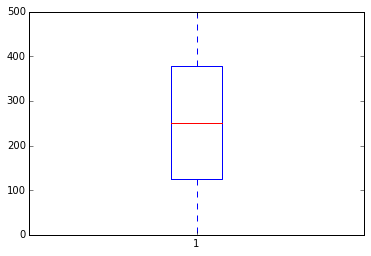

In [3]:
plt.boxplot(values2)

Looking at the output, you have direct access to a all of the attributes of the plot directly

[array([ 125.,    0.]), array([ 379.,  499.])]

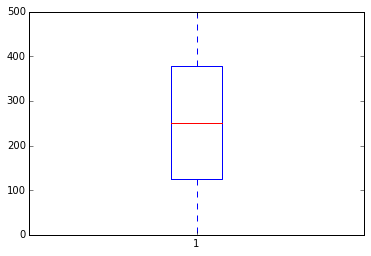

In [4]:
B = plt.boxplot(values2)
[item.get_ydata() for item in B['whiskers']]

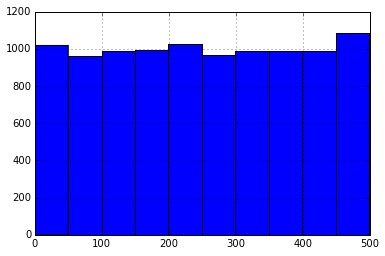

In [5]:
pdhist = values2.hist()

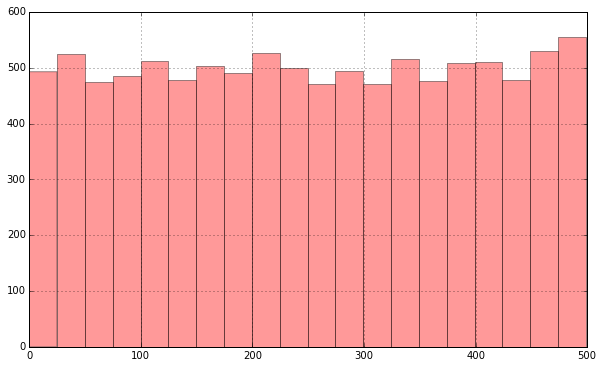

In [6]:
pdhist2 = values2.hist(bins=20, color='r',alpha=0.4, figsize=(10,6))

In [7]:
df = pd.DataFrame(np.random.rand(10,2), columns=['Col1', 'Col2'] )
df.head(5)

,Col1,Col2
0,0.282989,0.355462
1,0.244039,0.310604
2,0.501950,0.873311
3,0.228733,0.662717
4,0.669910,0.052023


Pandas allows you to plot multiple columns at once quickly

/afs/crc.nd.edu/user/k/kfeldman/anaconda/lib/python2.7/site-packages/pandas/tools/plotting.py:2633: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  warnings.warn(msg, FutureWarning)


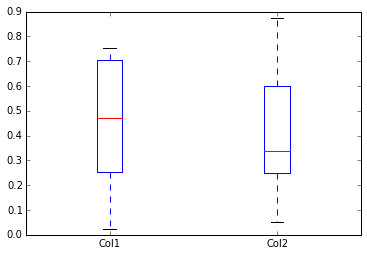

In [8]:
box = df.boxplot(grid=False)

MatPlotLib also provides this functionality, plotting items in list form

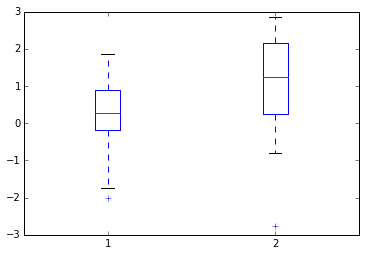

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)

x1 = np.random.normal(0,1,50)
x2 = np.random.normal(1,1,50)

npbox = ax.boxplot([x1,x2])

In [10]:
df = pd.DataFrame(np.random.rand(200,2))
df.head(5)

,0,1
0,0.054160,0.364663
1,0.421165,0.398492
2,0.522974,0.788862
3,0.842114,0.614022
4,0.526816,0.638160


/afs/crc.nd.edu/user/k/kfeldman/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


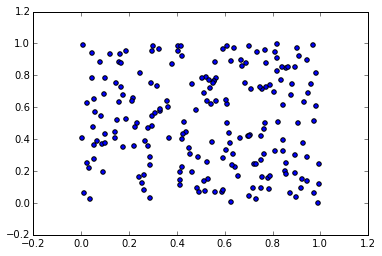

In [11]:
pdscatter = plt.scatter(df[0], df[1])

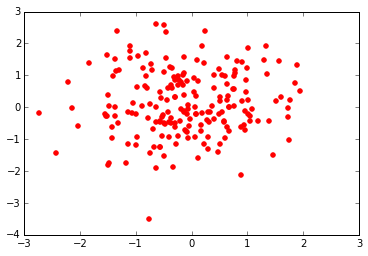

In [12]:
x = np.random.randn(200)
y = np.random.randn(200)

fig = plt.figure()
ax = fig.add_subplot(111)

npscatter = ax.scatter(x,y,color='r')

# Q-Q Plot Examples

## Are these plots useful for only comparing two distribuations?

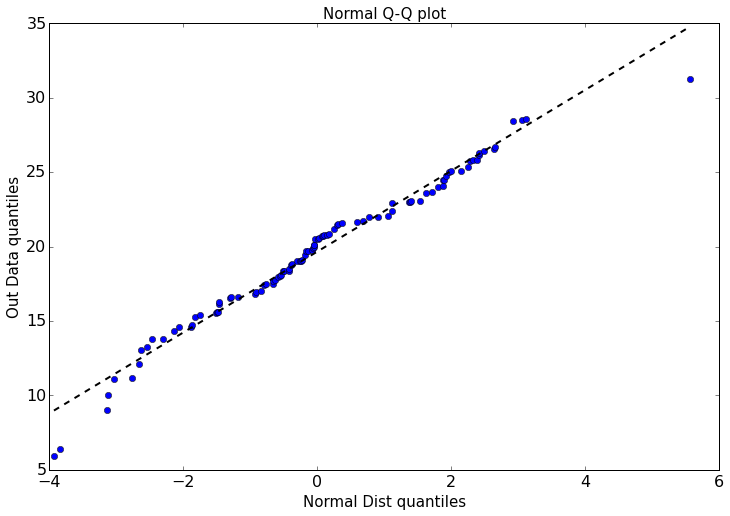

In [13]:
data=np.random.normal(loc = 20, scale = 5, size=100) 
data.sort()
norm=np.random.normal(0,2,len(data))
norm.sort()
plt.figure(figsize=(12,8),facecolor='1.0') 

plt.plot(norm,data,"o")

#generate a trend line as in http://widu.tumblr.com/post/43624347354/matplotlib-trendline
z = np.polyfit(norm,data, 1)
p = np.poly1d(z)
plt.plot(norm,p(norm),"k--", linewidth=2)
plt.title("Normal Q-Q plot",size=15)
plt.xlabel("Normal Dist quantiles",size=15)
plt.ylabel("Out Data quantiles",size=15)
plt.tick_params(labelsize=16)
plt.show()

### The Iris Dataset as an Example
We will use the "Iris dataset" as an example for employing these methods. The Iris flower dataset or Fisher's Iris dataset is a well-known multivariate dataset introduced by Sir Ronald Fisher in 1936 as an example of discriminant analysis, a method for finding a linear combination of features that characterizes or separates two or more classes of objects or events. Fischer is famous for helping to develop the foundation for modern statistical science, and his method of linear discriminant analysis is perhaps the earliest classification method.

Let's fetch the Iris dataset from the UCI Machine Learning repository.

In [14]:
fileURL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
data = pd.read_csv(fileURL, names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Name'], header=None)
iris_data = data.dropna()
iris_data.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


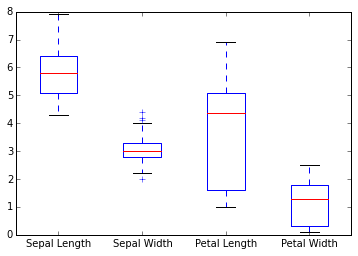

In [15]:
pl2 = iris_data.boxplot(grid=False)

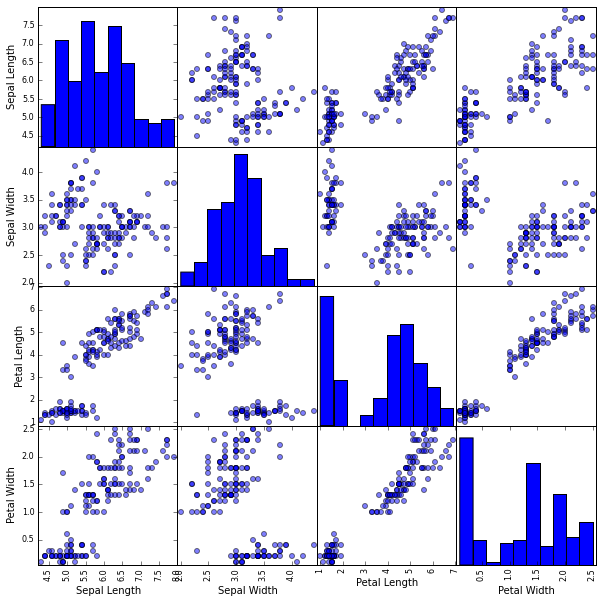

In [16]:
pl1 = pd.tools.plotting.scatter_matrix(iris_data, diagonal='hist', figsize=(10,10), s=100)

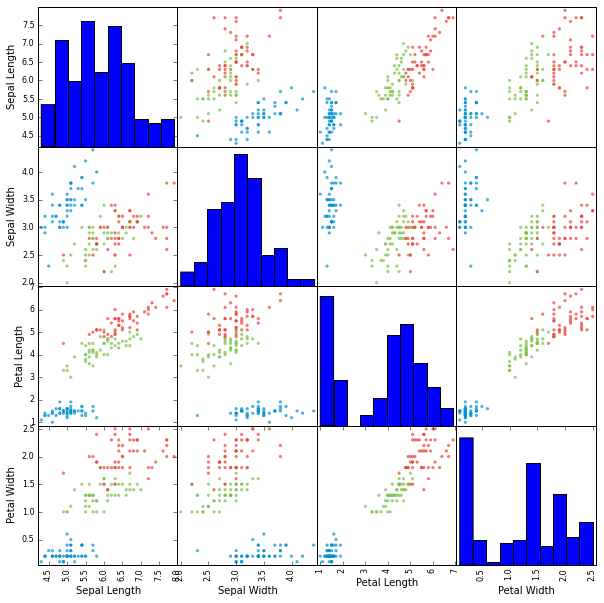

In [17]:
iris_data['Name'].replace('Iris-setosa','#0392cf',inplace=True)
iris_data['Name'].replace('Iris-versicolor','#7bc043',inplace=True)
iris_data['Name'].replace('Iris-virginica','#ee4035',inplace=True)
ax = pd.scatter_matrix(iris_data,color=list(iris_data['Name']), alpha=0.6, figsize=(10, 10), diagonal='hist')


# Distance Metrics

In [18]:
import math
def euclidean(a,b):
    return math.sqrt(sum([(a - b) ** 2 for a, b in zip(x, y)]))

X = (pd.DataFrame(np.arange(4 * 2). reshape(4, 2)))
X

,0,1
0,0,1
1,2,3
2,4,5
3,6,7


In [19]:
dist = np.zeros([len(X),len(X)])
for i in xrange(0,len(X)):
    for j in xrange(0,len(X)):
        x = tuple(X.iloc[i].values)
        y = tuple(X.iloc[j].values)
        dist[i][j] = euclidean(x,y)
    
dist

array([[ 0.        ,  2.82842712,  5.65685425,  8.48528137],
       [ 2.82842712,  0.        ,  2.82842712,  5.65685425],
       [ 5.65685425,  2.82842712,  0.        ,  2.82842712],
       [ 8.48528137,  5.65685425,  2.82842712,  0.        ]])

In [20]:
def manhattan(x, y):
    return sum(abs(b - a) for a,b in zip(x, y))

dist = np.zeros([len(X),len(X)])
for i in xrange(0,len(X)):
    for j in xrange(0,len(X)):
        x = tuple(X.iloc[i].values)
        y = tuple(X.iloc[j].values)
        dist[i][j] = manhattan(x,y)
    
dist

array([[  0.,   4.,   8.,  12.],
       [  4.,   0.,   4.,   8.],
       [  8.,   4.,   0.,   4.],
       [ 12.,   8.,   4.,   0.]])

In [21]:
from scipy.spatial import distance
a = (1,2,3)
b = (4,5,6)
dst = distance.euclidean(a,b)
dst

5.196152422706632

In [22]:
from sklearn.metrics.pairwise import euclidean_distances
euclidean_distances(X, X)

array([[ 0.        ,  2.82842712,  5.65685425,  8.48528137],
       [ 2.82842712,  0.        ,  2.82842712,  5.65685425],
       [ 5.65685425,  2.82842712,  0.        ,  2.82842712],
       [ 8.48528137,  5.65685425,  2.82842712,  0.        ]])

In [23]:
from sklearn.metrics.pairwise import manhattan_distances
manhattan_distances(X, X)

array([[  0.,   4.,   8.,  12.],
       [  4.,   0.,   4.,   8.],
       [  8.,   4.,   0.,   4.],
       [ 12.,   8.,   4.,   0.]])

# Data Normalization

In [24]:
df = pd.DataFrame(np.arange(5 * 4). reshape(5, 4))
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


## Min - Max

In [25]:
#Columns
normalized_df=(df-df.min())/(df.max()-df.min())
normalized_df

,0,1,2,3
0,0.00,0.00,0.00,0.00
1,0.25,0.25,0.25,0.25
2,0.50,0.50,0.50,0.50
3,0.75,0.75,0.75,0.75
4,1.00,1.00,1.00,1.00


In [26]:
#Rows
normalized_df = df.apply(lambda x: (x-x.min())/(x.max()-x.min()), axis=1)
normalized_df

,0,1,2,3
0,0,0.333333,0.666667,1
1,0,0.333333,0.666667,1
2,0,0.333333,0.666667,1
3,0,0.333333,0.666667,1
4,0,0.333333,0.666667,1


## Z-Score

In [27]:
#Columns
normalized_df = (df - df.mean())/df.std()
normalized_df

,0,1,2,3
0,-1.264911,-1.264911,-1.264911,-1.264911
1,-0.632456,-0.632456,-0.632456,-0.632456
2,0.000000,0.000000,0.000000,0.000000
3,0.632456,0.632456,0.632456,0.632456
4,1.264911,1.264911,1.264911,1.264911


In [28]:
#Rows
normalized_df = df.apply(lambda x: (x-x.mean())/(x.std()), axis=1)
normalized_df

,0,1,2,3
0,-1.161895,-0.387298,0.387298,1.161895
1,-1.161895,-0.387298,0.387298,1.161895
2,-1.161895,-0.387298,0.387298,1.161895
3,-1.161895,-0.387298,0.387298,1.161895
4,-1.161895,-0.387298,0.387298,1.161895


### Is Normalizing Always Useful?

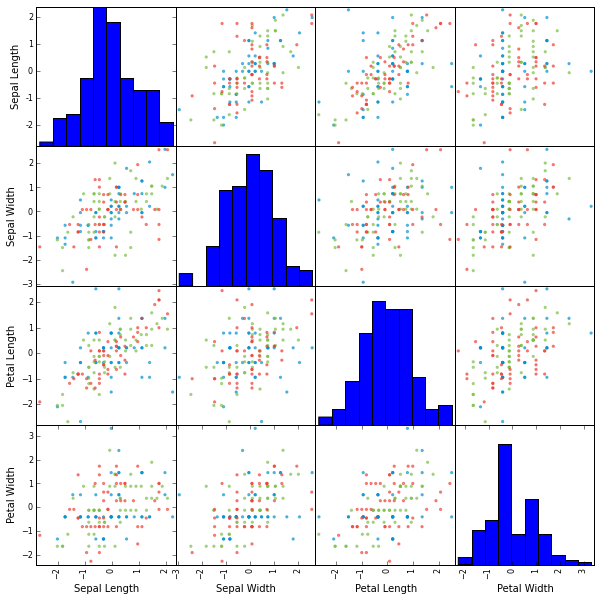

In [29]:
colors = list(iris_data['Name'])
iris_data = iris_data.groupby('Name').transform(lambda x: (x-x.mean())/x.std(ddof=1))
ax = pd.scatter_matrix(iris_data,color=colors, alpha=0.6, figsize=(10, 10), diagonal='hist')

## Cosine Simlarity

In [30]:
from scipy.spatial.distance import cosine
from sklearn.metrics import pairwise_distances

A = np.array(
[[4, 3, 5, 0, 1],
[2, 6, 1, 1, 1],
[1, 1, 0, 7, 0]])

dist_out = 1-pairwise_distances(A, metric="cosine")
dist_out

array([[ 1.        ,  0.68333027,  0.1372549 ],
       [ 0.68333027,  1.        ,  0.32031107],
       [ 0.1372549 ,  0.32031107,  1.        ]])

In [31]:
normalized_df = np.sum(np.abs(A)**2,axis=-1)**(1./2)
a = list(A[0]/normalized_df[0])
b = list(A[1]/normalized_df[1])
c = list(A[2]/normalized_df[2])
A = np.matrix([a,b,c])
A.dot(A.T)

matrix([[ 1.        ,  0.68333027,  0.1372549 ],
        [ 0.68333027,  1.        ,  0.32031107],
        [ 0.1372549 ,  0.32031107,  1.        ]])